In [52]:
from matplotlib import pyplot as plt
import seaborn as sns
import json
import sklearn 
import sklearn.decomposition
import sklearn.manifold
import numpy as np
import pandas as pd

In [53]:
fname = '../embeddings/cifar_100_davinci-001.json'
with open(fname, 'r') as f:
    embeddings = json.load(f)

In [54]:
X = np.asarray(list(embeddings.values()))

In [60]:
pca = sklearn.manifold.TSNE(n_components=2)
transformed = pca.fit_transform(X)

/home/chrisw/miniconda3/envs/openai/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/chrisw/miniconda3/envs/openai/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [61]:
transformed

array([[ -6.8104806 , -27.323717  ],
       [  2.6869044 , -13.297166  ],
       [ -1.6505073 , -25.913162  ],
       [ -7.1252365 , -17.44617   ],
       [ -0.95604604, -15.330769  ],
       [  4.3694654 , -44.898273  ],
       [  1.8874178 , -40.932682  ],
       [-25.106848  , -20.1296    ],
       [  2.3026595 , -19.287643  ],
       [  1.5680009 , -33.35755   ],
       [ 14.205207  ,  42.42731   ],
       [ 21.130333  ,  38.468636  ],
       [ 18.902641  ,  46.704273  ],
       [ 26.38826   ,  42.97778   ],
       [ 21.287697  ,  43.044064  ],
       [-10.760732  ,  48.33771   ],
       [ -9.297536  ,  38.106224  ],
       [ -6.576785  ,  46.117874  ],
       [ -9.850444  ,  42.899403  ],
       [-15.579906  ,  38.426952  ],
       [  5.314679  ,  35.350525  ],
       [ 21.821709  ,  32.35174   ],
       [  9.160199  ,  39.812614  ],
       [  4.8625855 ,  31.444164  ],
       [ 14.473437  ,  32.139423  ],
       [ -8.650346  ,  11.560531  ],
       [ 40.022396  ,  11.822866  ],
 

In [62]:
df = pd.DataFrame(transformed)

In [63]:
df = df.rename(columns={0: "x1", 1: "x2"})

In [88]:
groups = 5*[0] + 5*[1] + 5*[2] + 5*[3] + 5*[4] + 5*[5] + 5*[6] + 5*[7] + 5*[8] + 5*[9] 
groups += 5*[10] + 5*[11] + 5*[12] + 5*[13] + 5*[14] + 5*[15] + 5*[16] + 5*[17] + 5*[18] + 5*[19]

/home/chrisw/miniconda3/envs/openai/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'x2')

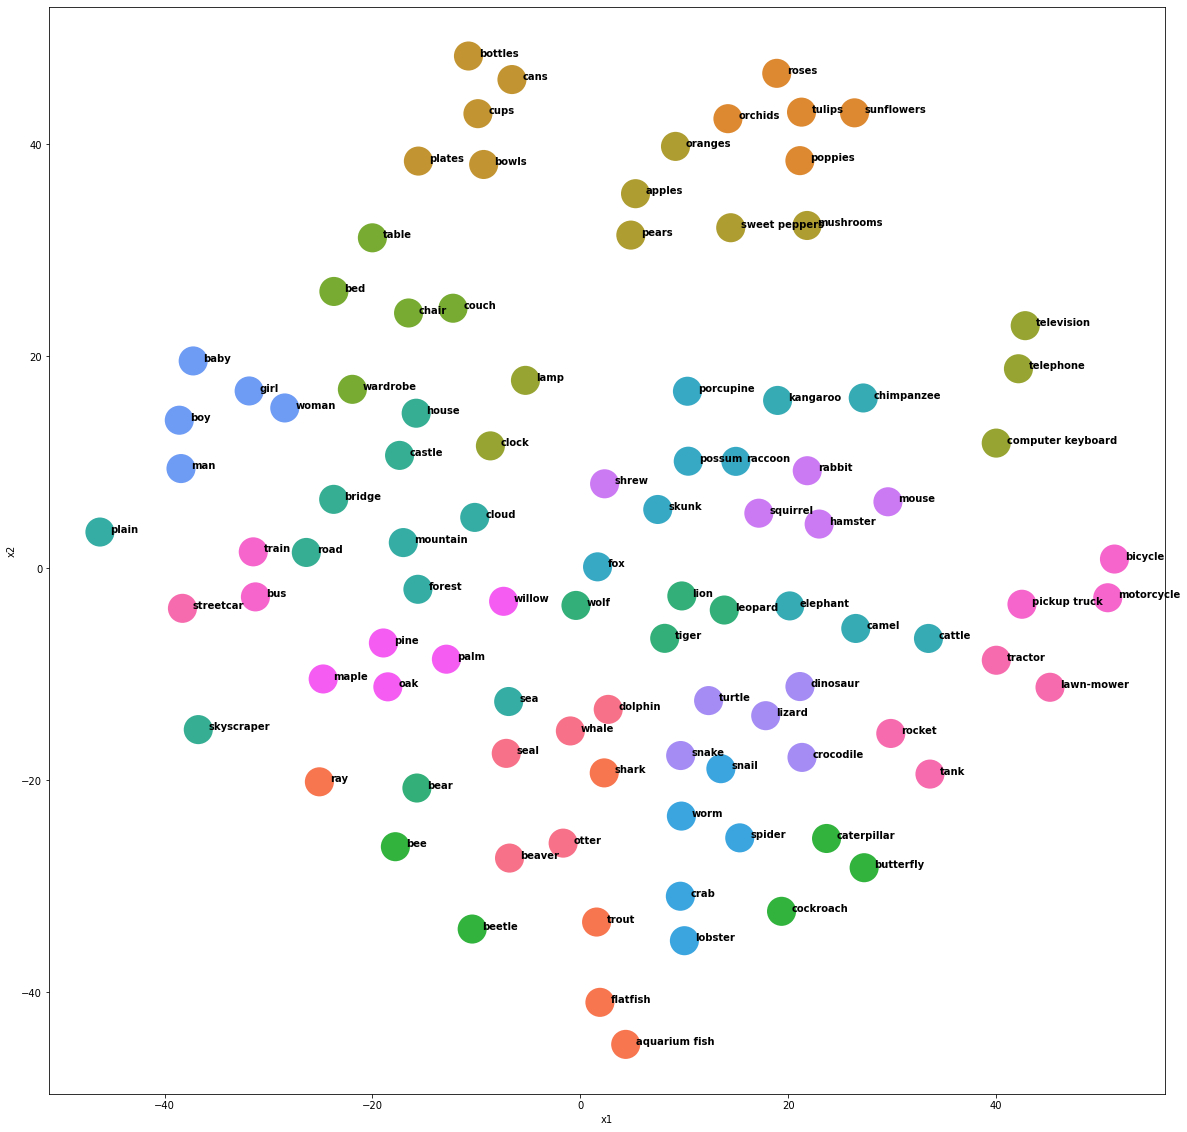

In [89]:
names = list(embeddings.keys())
plt.figure(figsize=(20,20))
p1 = sns.scatterplot('x1', # Horizontal axis
       'x2', # Vertical axis
       hue=groups,
       data=df, # Data source
       legend=False, 
       s=1000,
       palette=sns.color_palette("husl", 20))  

for line in range(0,df.shape[0]):
     p1.text(df.x1[line]+1, df.x2[line], 
     names[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')

# Set x-axis label
plt.xlabel('x1')
# Set y-axis label
plt.ylabel('x2')